Importing Necessary Libraries and Packages

In [ ]:
#Importing the Libraries,
# Here, we are using , OpenCV, Matplotlib, Tensorflow, And keras

import tensorflow as tf
import keras as ks
import os, shutil, imghdr
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#Limiting the memory to the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Defining the Data

In [5]:
#Defining the base directories
base_dir= '/media/vivek/SanDiskGen1/Project/dataset'
#base_dir= 'F:\\Project\\dataset'
data_dir= base_dir + '/archive/animals/animals/'
#data_dir= base_dir + '\\archive\\animals\\animals\\'
data= data_dir


Loading The Data

In [6]:
# Initialize ImageDataGenerator for data augmentation

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2, #Splitting the data into training and validation
)

# Load and augment the dataset
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=4,
    class_mode='sparse',
    subset='training'  # Specify training subset
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=4,
    class_mode='sparse',
    subset='validation'  # Specify validation subset
)
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=4,
    class_mode='sparse',
      # Using the same subset as validation for the test set
)
# Split the dataset into train, validation, and test sets
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1



Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Found 5400 images belonging to 90 classes.


Scaling The Data

Split Data

Deep Learning Model

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import EarlyStopping
from scipy import *
from tensorflow.keras.regularizers import *


#importing neccesary libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import backend as K
input_shape = (256, 256, 3)
num_classes = 90

def swish_activation(x):
    return x * K.sigmoid(x)

# Define the custom CNN model inspired by EfficientNetB7
def create_custom_cnn(input_shape, num_classes):
    model = Sequential()

    # Stem Convolutional Layer
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation(swish_activation))

    # MBConv Blocks (similar to EfficientNetB7)
    # You can add more blocks or adjust the parameters to make it closer to EfficientNetB7
    for _ in range(2):
        model.add(Conv2D(128, (3,3),strides=(1,1), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation(swish_activation))

        model.add(Conv2D(64, (3,3),strides=(1,1), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation(swish_activation))

        model.add(Conv2D(64, (3,3),strides=(1,1), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation(swish_activation))
        
        model.add(Conv2D(256, (1, 1),strides=(1,1), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation(swish_activation))

        
        
        model.add(Conv2D(64, (3, 3), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation(swish_activation))

        model.add(Conv2D(256, (1, 1), padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(1)))
        # Skip connection
        shortcut = Conv2D(1024, (1, 1), padding='same')(model.layers[-3].output)
        shortcut = BatchNormalization()(shortcut)
        model.add(Activation(swish_activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Dropout(0.5))

    # Head Convolutional Layer
    model.add(Conv2D(1280, (1, 1), padding='same'))
   # model.add(BatchNormalization())
    model.add(Activation(swish_activation))

    # Global Average Pooling
    model.add(GlobalAveragePooling2D())
    
    model.add(Flatten())
    # Fully Connected Layers
    model.add(Dense(256,  activation='relu' , activity_regularizer=L2(0.01)))
    model.add(Activation(swish_activation))
    model.add(Dense(128,  activation='relu' , activity_regularizer=L2(0.01)))
    model.add(Activation(swish_activation))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Set input shape and number of classes

# Create the custom CNN model
model = create_custom_cnn(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 128)     512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128, 128, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 128)     512       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 128, 128, 128)     0

In [9]:
logs = base_dir + '\\logs'
logdir = logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

In [ ]:

# Define the path to your checkpoint file
checkpoint_path = base_dir + "cp_pos_succues.ckpt"

# Load the weights of the model from the checkpoint file
model.load_weights(checkpoint_path)

In [13]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your current model
model.save('acc0.2949_val_0.2380.h5')  # Save the model as 'my_model.h5'


TEST

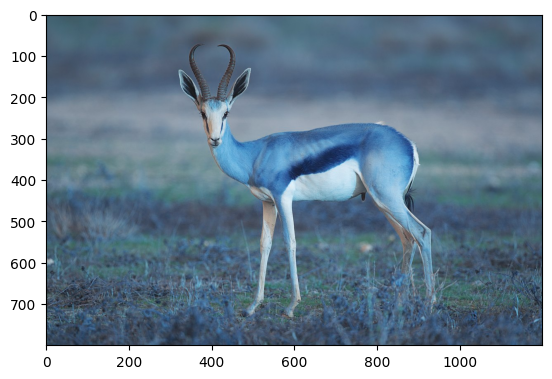

In [14]:
import cv2

img = cv2.imread('test.jpg')
plt.imshow(img)
plt.show()

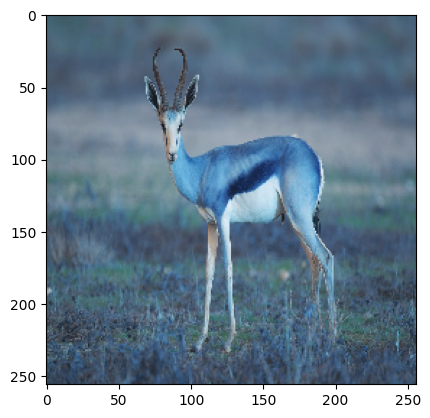

In [17]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
import numpy as np

In [18]:
yhat = model.predict(np.expand_dims(resize/255, 0))

2024-03-05 23:09:54.577760: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.
2024-03-05 23:09:54.588270: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.
2024-03-05 23:09:54.597239: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.
2024-03-05 23:09:54.662373: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.
2024-03-05 23:09:54.667929: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.


1/1 [==============================] - 3s 3s/step


In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

# Define the custom activation function
def swish_activation(x):
    return tf.keras.backend.sigmoid(x) * x

# Register the custom activation function
tf.keras.utils.get_custom_objects().update({'swish_activation': Activation(swish_activation)})


# Now you should be able to use the loaded model for predictions without encountering the activation function error


In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('acc61_val_35.h5')

# Preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256))  # Assuming model input shape is (256, 256, 3)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

# Function to get class names from a text file
def get_class_names(file_path):
    class_names = {}
    with open(file_path, 'r') as f:
        for idx, line in enumerate(f):
            class_names[idx] = line.strip()
    return class_names

# Make predictions on the preprocessed image
def predict_image(image_path, class_names):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    top_classes = np.argsort(predictions[0])[::-1][:10]  # Get indices of top 5 classes
    top_class_names = [class_names[idx] for idx in top_classes]
    top_probabilities = predictions[0][top_classes]
    return top_class_names, top_probabilities
file_path='name.txt'
# Test the model on a sample image
image_path = 'flam.jpg'
class_names = get_class_names('name.txt')
top_classes, top_probabilities = predict_image(image_path, class_names)





1/1 [==============================] - 0s 354ms/step


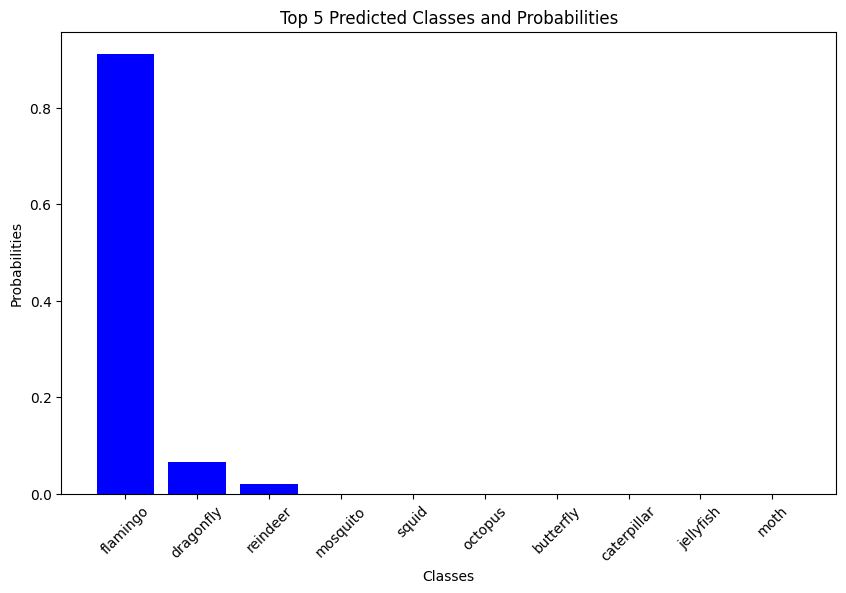

In [43]:
# Plot the graph of probabilities
plt.figure(figsize=(10, 6))
plt.bar(top_classes, top_probabilities, color='blue')
plt.xlabel('Classes')
plt.ylabel('Probabilities')
plt.title('Top 5 Predicted Classes and Probabilities')
plt.xticks(rotation=45)
plt.show()